In [124]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import random

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'
matplotlib.rcParams['axes.unicode_minus'] = False



In [125]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

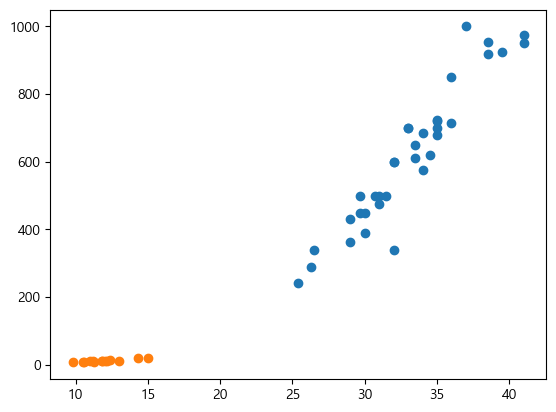

In [126]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

In [127]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
result = [1]*35+[0]*14 # 1 도미 0 빙어

In [128]:
# DataFrame
data = [length,weight,result]
df = pd.DataFrame(data)
df = df.T # 행과 열을 바꿔줌
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [129]:
datas = df.iloc[:,0:2]
datas


,0,1
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [130]:

results =df.iloc[:,2]
results

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [131]:
from sklearn.model_selection import train_test_split
# random_state = 42 훈련세트, 테스트세트가 할 때마다 섞이지 않도록 해줌.
# startify : 설정데이터를 가지고 랜덤으로 데이터를 섞어줌.
train_input, test_input, train_target, test_target = train_test_split(
     datas,results,stratify=results,random_state=42)

# train_input

In [132]:
# 1. 데이터의 전처리 : Nan, 0, 타입 등을 표준화작업 , 훈련세트, 테스트세트
# 2. 데이터 학습시키기
clf = KNeighborsClassifier() # 이웃하고 있는 정보들로 분별
clf.fit(train_input,train_target)
# 3. 데이터 예측하기
predict = clf.predict(test_input)
predict

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [133]:
# 4. 정확도 측정
score = clf.score(test_input,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [134]:
# 실험 데이터로 확인
predict = clf.predict([[30,600]])
print("판별 : ",predict)

판별 :  [1.]


In [135]:
predict2 = clf.predict([[25,150]])
print("판별 : ",predict2)

판별 :  [0.]


In [136]:
# 25,150의 데이터는 knn판별할 때 이웃하는 데이터는 indexes
distance,indexes = clf.kneighbors([[25,150]])
indexes

array([[21, 33, 19, 30,  1]], dtype=int64)

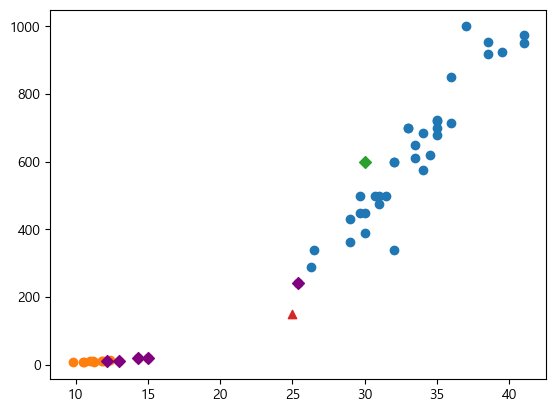

In [137]:
# plt.xlim(0,1000)# = plt.xsticks([0,1000])
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D',color='purple')
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^') # 판별은 빙어, 그래프는 도미와 더 가까움

In [138]:
# pandas -  mean 평균 ,std 표준편차
train_input.mean()
train_input.std()

0     10.124045
1    327.884969
dtype: float64

In [139]:
# 표준점수 : 훈련데이터 - 평균 / 표준편차
# munpy : 평균,표준편차

mean = np.mean(train_input,axis =0) # 첫번째 컬럼, 두번째 컬럼의 평균
std = np.std(train_input,axis = 0)


In [140]:
# train_input, test_input 
train_scaled = (train_input-mean)/std #(-1.5~1.5)


In [141]:
new = ([25,150]-mean)/std
new

0   -0.230126
1   -0.940607
dtype: float64

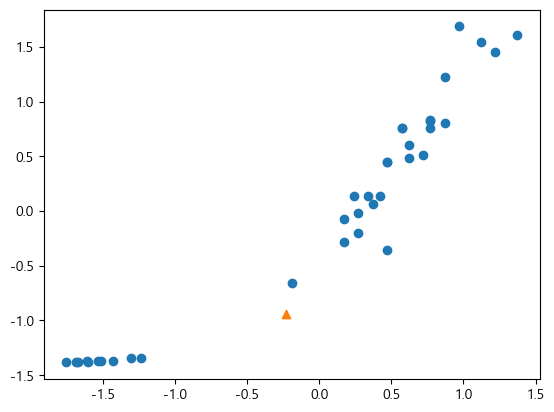

In [142]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1]) #(-1.5~1.5)
plt.scatter(new[0],new[1],marker='^')

In [143]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [144]:
test_scaled = (test_input-mean)/std


In [145]:
score = clf.score(test_scaled,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [146]:
predict = clf.predict([new])
print("예측값 : ",predict)

예측값 :  [1.]


In [147]:
# knn 예측에 사용한 데이터
distance,indexes = clf.kneighbors([new])
indexes

array([[21, 14, 34, 32,  5]], dtype=int64)

In [148]:
train_scaled.iloc[indexes[0],0]

0    -0.190056
3     0.170577
7     0.270753
13    0.471105
4     0.170577
Name: 0, dtype: float64

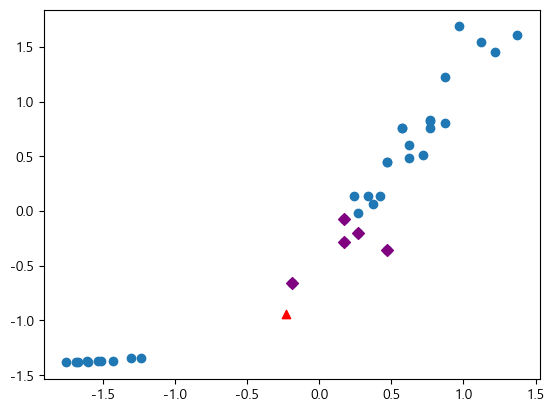

In [149]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(train_scaled.iloc[indexes[0],0],train_scaled.iloc[indexes[0],1],marker='D',color='purple')
plt.scatter(new[0],new[1],marker='^',color='r')